In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#import data
data = pd.read_csv("/content/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


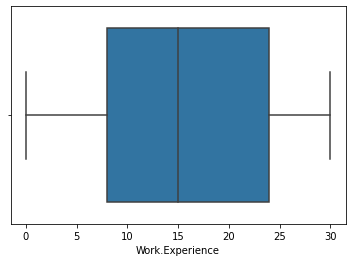

In [13]:
import seaborn as sns
sns.boxplot (data['Work.Experience'])
# there is no outlier

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Urban'] = le.fit_transform(data['Urban'])
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [14]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


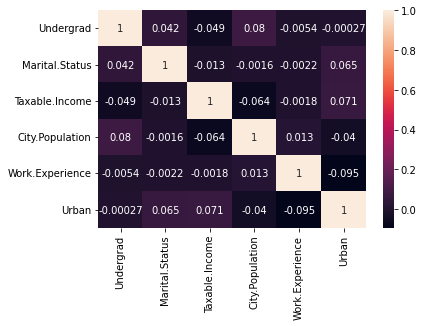

In [16]:
sns.heatmap(data.corr(),annot = True)
#there is no multi collinearity

## Model Building

In [22]:
#Since the target variable is continious, we create  groups
# "Risky" <= 30000
# 30000 => "good"

In [ ]:
data['Taxable.Income']=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [21]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
...,...,...,...,...,...,...
595,1,0,good,39492,7,1
596,1,0,good,55369,2,1
597,0,0,good,154058,0,1
598,1,1,good,180083,17,0


In [23]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
#Dividing the data into independent and dependent variable
#X = pd.concat ([data.iloc[:,0:4],data.iloc[:,5]],axis=1)
X = data.drop(['Taxable.Income'],axis=1)
y = data['Taxable.Income']

In [26]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [27]:
y_train.value_counts()

good     384
risky     96
Name: Taxable.Income, dtype: int64

### Model building by Entropy method - classification problems

In [28]:
# fitting Entropy method DT
from sklearn.tree import DecisionTreeClassifier
entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

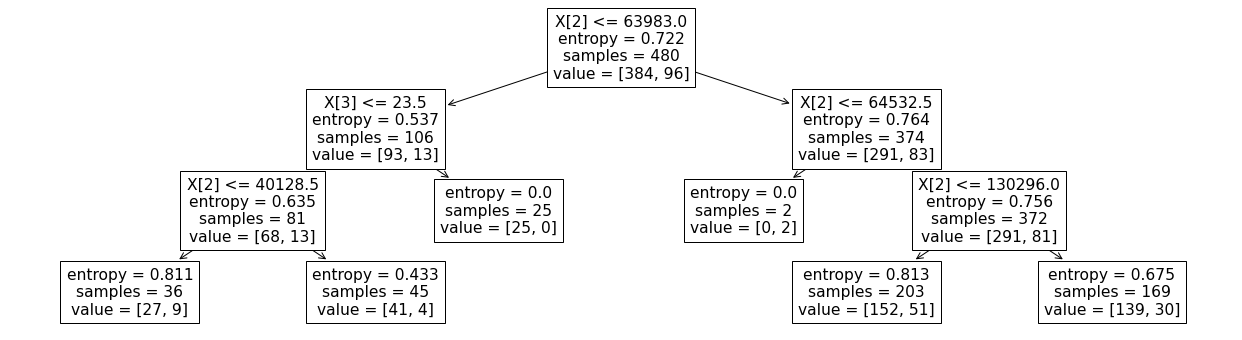

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
#plot decision tree
plt.figure(figsize = (22,6))
tree.plot_tree(entropy);

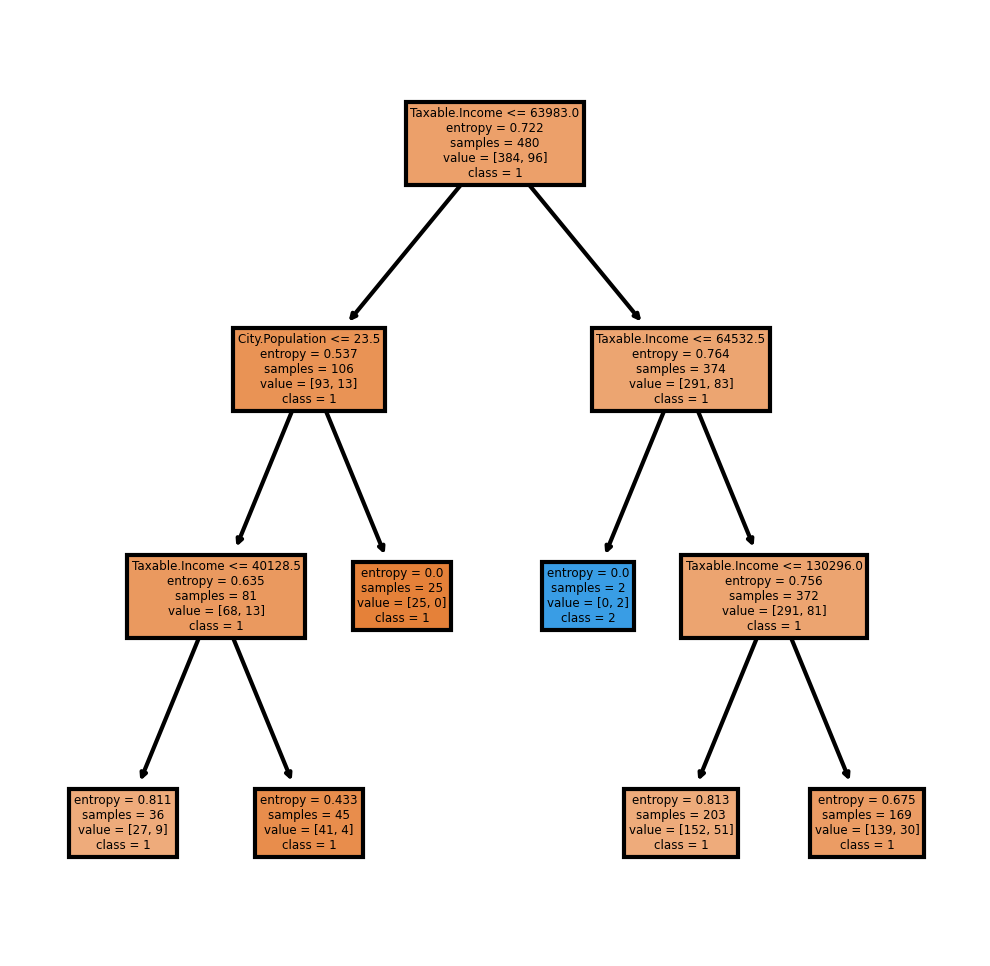

In [33]:
import matplotlib.pyplot as plt
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [36]:
#Model prediction
y_pred = entropy.predict(X_test)
y_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [37]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy score :", acc*100)

[[92 28]
 [ 0  0]]
Accuracy score : 76.66666666666667


### Model building by GINI method - Regression problems

In [38]:
# fitting GINI method DT
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = 'gini', max_depth =3)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

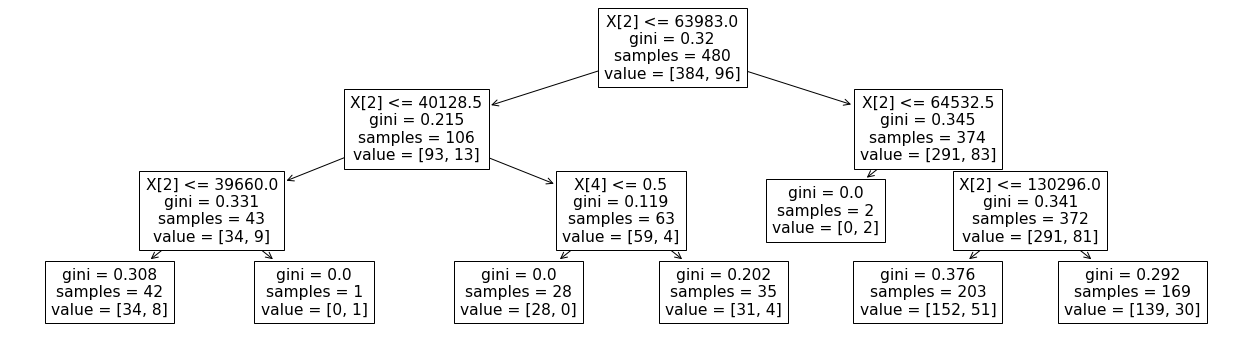

In [39]:
#plot decision tree
from sklearn import tree
plt.figure(figsize = (22,6))
tree.plot_tree(gini);

In [40]:
#Model prediction
y_pred = gini.predict(X_test)
y_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
     

In [41]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy=", acc*100)

[[91 28]
 [ 1  0]]
Accuracy= 75.83333333333333


In [44]:
impor = pd.DataFrame({'feature': list(X_train.columns), 'importance': entropy.feature_importances_}).sort_values('importance', ascending = False)
impor

,feature,importance
2,City.Population,0.710037
3,Work.Experience,0.289963
0,Undergrad,0.000000
1,Marital.Status,0.000000
4,Urban,0.000000


From the above table POPULATION is the most important attribute for taxable income

